In [1]:
# Import libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Base path from where the notebook runs
base_path = os.path.join('..', 'data', 'geoai-ground-level-no2-estimation-challenge20240710-12938-q3sk51')

# Routes to the archives
train_path = os.path.join(base_path, 'Train.csv')
test_path = os.path.join(base_path, 'Test.csv')
sample_submission_path = os.path.join(base_path, 'SampleSubmission.csv')

# Data loading function with error handling
def load_data(file_path: str) -> pd.DataFrame:
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"Error: File not found in the specified path: {file_path}")
        return pd.DataFrame()

# Load data
train_df = load_data(train_path)
test_df = load_data(test_path)
sample_submission_df = load_data(sample_submission_path)

In [8]:
# Display the first few rows of each dataframe
print("Train DataFrame:")
train_df

Train DataFrame:


,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
0,ID_ENTGC7,1/1/19,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.000
1,ID_8JCCXC,1/1/19,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.000
2,ID_V3136Z,1/1/19,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.000
3,ID_KRVZDJ,1/1/19,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.000
4,ID_PR351A,1/1/19,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86579,ID_NCWXIY,31-12-21,X9897,45.498227,9.556232,0.000000,NaN,-0.434350,0.250490,0.000032,0.000643,NaN,13063.79770,39.750
86580,ID_UDQIEE,31-12-21,X9928,45.142541,10.043836,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.125
86581,ID_ENDUPX,31-12-21,X9969,45.842207,9.351658,0.000000,284.98,-0.157753,0.000000,0.000031,0.000153,0.000122,13050.16499,28.325
86582,ID_3ZBA6C,31-12-21,X9993,45.113503,8.874065,0.000000,NaN,-0.798636,0.399524,0.000031,0.000717,NaN,13061.41329,21.250


In [9]:
print("Test DataFrame:")
test_df

Test DataFrame:


,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure
0,ID_2MYNQS,1/1/19,PD03,45.289376,11.642394,3.277529,NaN,-0.313361,0.771456,0.000024,0.000075,NaN,14440.02819
1,ID_P4U5WU,1/1/19,TV03,45.836941,12.510362,0.000000,NaN,-0.229512,0.398208,0.000023,0.000120,NaN,14434.04790
2,ID_U4KWPK,1/1/19,X5561,45.582894,8.842165,0.000000,282.98,-0.470822,0.153694,0.000023,0.000171,0.000148,14427.42478
3,ID_QGSNTZ,1/1/19,X5953,45.131947,10.015742,1.928031,NaN,0.132952,0.756917,0.000024,0.000266,NaN,14443.09006
4,ID_GHSZ6K,1/1/19,X6701,45.186329,9.146666,0.000000,NaN,-0.198272,0.678858,0.000023,0.000149,NaN,14440.85840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6571,ID_GUSXU9,12/31/21,TV03,45.836941,12.510362,0.000000,282.58,-0.013364,0.000000,0.000032,0.000135,0.000103,13060.46860
6572,ID_GMVEG1,12/31/21,X5561,45.582894,8.842165,0.000000,285.12,-0.412887,0.002098,0.000031,0.000201,0.000171,13056.11764
6573,ID_GD6HNP,12/31/21,X5953,45.131947,10.015742,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6574,ID_J7YW1Y,12/31/21,X6701,45.186329,9.146666,0.000000,NaN,-1.025128,0.476947,0.000031,0.000751,NaN,13063.22260


In [10]:
print("Sample Submission DataFrame:")
sample_submission_df

Sample Submission DataFrame:


,ID_Zindi,GT_NO2
0,ID_003WOR,0
1,ID_009Y2B,0
2,ID_01C05M,0
3,ID_0216G3,0
4,ID_023C6G,0
...,...,...
6571,ID_ZVEQ52,0
6572,ID_ZWZ1IA,0
6573,ID_ZX7B4A,0
6574,ID_ZYZLPS,0


In [14]:
# General information of the dataframes if they are loaded correctly
print("\nTrain DataFrame information:")
print(' ')
train_df.info()


Train DataFrame information:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86584 entries, 0 to 86583
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Zindi            86584 non-null  object 
 1   Date                86584 non-null  object 
 2   ID                  86584 non-null  object 
 3   LAT                 86584 non-null  float64
 4   LON                 86584 non-null  float64
 5   Precipitation       86584 non-null  float64
 6   LST                 46798 non-null  float64
 7   AAI                 73709 non-null  float64
 8   CloudFraction       73709 non-null  float64
 9   NO2_strat           73709 non-null  float64
 10  NO2_total           73709 non-null  float64
 11  NO2_trop            51111 non-null  float64
 12  TropopausePressure  73709 non-null  float64
 13  GT_NO2              82051 non-null  float64
dtypes: float64(11), object(3)
memory usage: 9.2+ MB


In [15]:
print("\nInformación del Test DataFrame:")
print(' ')
test_df.info()


Información del Test DataFrame:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6576 entries, 0 to 6575
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Zindi            6576 non-null   object 
 1   Date                6576 non-null   object 
 2   ID                  6576 non-null   object 
 3   LAT                 6576 non-null   float64
 4   LON                 6576 non-null   float64
 5   Precipitation       6576 non-null   float64
 6   LST                 3595 non-null   float64
 7   AAI                 5708 non-null   float64
 8   CloudFraction       5708 non-null   float64
 9   NO2_strat           5708 non-null   float64
 10  NO2_total           5708 non-null   float64
 11  NO2_trop            3998 non-null   float64
 12  TropopausePressure  5708 non-null   float64
dtypes: float64(10), object(3)
memory usage: 668.0+ KB


In [16]:
# Statistical description of training data
print("\nStatistical description of Train DataFrame:")
display(train_df.describe())


Statistical description of Train DataFrame:


,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
count,86584.000000,86584.000000,86584.000000,46798.000000,73709.000000,73709.000000,73709.000000,73709.000000,51111.000000,73709.000000,82051.000000
mean,45.421456,10.014272,2.585528,299.268841,-1.274999,0.200606,0.000045,0.000156,0.000105,16655.112392,24.535051
std,0.225409,1.056637,7.617394,10.927167,0.693003,0.259607,0.000012,0.000103,0.000092,3000.748790,17.108838
min,44.924694,8.736497,0.000000,253.200000,-5.196266,0.000000,0.000013,-0.000012,-0.000025,8614.349685,0.000000
25%,45.249544,9.195325,0.000000,290.920000,-1.749425,0.023900,0.000034,0.000100,0.000047,14432.114060,11.875000
50%,45.478996,9.611738,0.000000,300.760000,-1.349746,0.078478,0.000047,0.000122,0.000071,16711.190570,20.000000
75%,45.601232,10.683357,0.000000,307.940000,-0.878857,0.278451,0.000056,0.000173,0.000129,19252.648570,33.050000
max,45.889734,12.590682,135.396805,327.840000,2.143020,1.000000,0.000073,0.002047,0.001097,24449.007150,188.233333


In [17]:
# Verification of null values
print("\nValores nulos en el Train DataFrame:")
display(train_df.isnull().sum())


Valores nulos en el Train DataFrame:


ID_Zindi                  0
Date                      0
ID                        0
LAT                       0
LON                       0
Precipitation             0
LST                   39786
AAI                   12875
CloudFraction         12875
NO2_strat             12875
NO2_total             12875
NO2_trop              35473
TropopausePressure    12875
GT_NO2                 4533
dtype: int64

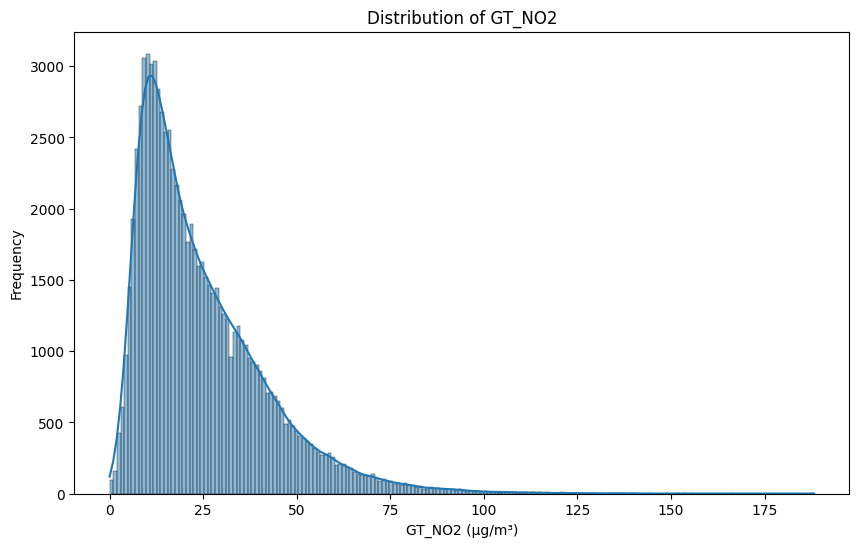

In [21]:
# Visualization of the distribution of the target variable GT_NO2
plt.figure(figsize=(10, 6))
sns.histplot(train_df['GT_NO2'].dropna(), kde=True)
plt.title('Distribution of GT_NO2')
plt.xlabel('GT_NO2 (µg/m³)')
plt.ylabel('Frequency')
plt.show()

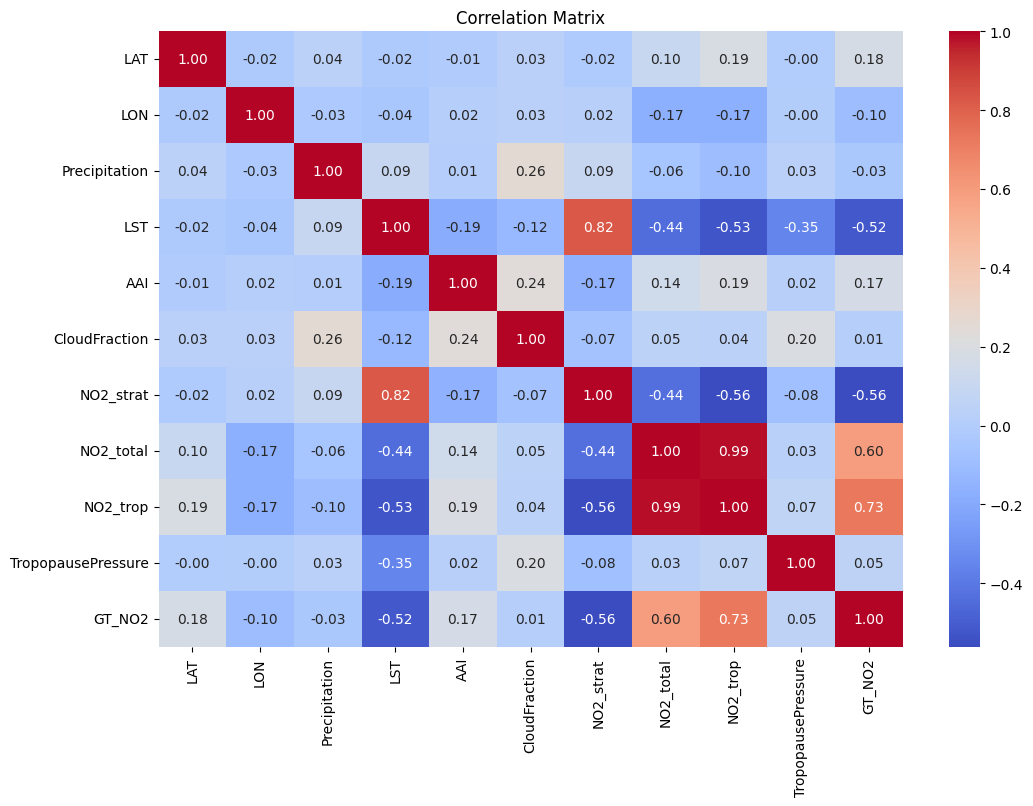

In [20]:
# Visualization of correlations between numerical variables
plt.figure(figsize=(12, 8))
numeric_columns = train_df.select_dtypes(include=[float, int]).columns
corr_matrix = train_df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()